In [1]:
from ultralytics import YOLO

#To initialize a model from scratch:
#model = YOLO('yolov8n-segreg.yaml')

# To load a pretrained model:  (Available pretrained are nano, medium and xlarge)
model = YOLO('./trained_models/nano.pt')

In [ ]:
# To train the model on a dataset:

model.train(data = './datasets/mmc_random/data.yaml', 
            mosaic = 1.0,
            hsv_h= 0.5,  # (float) image HSV-Hue augmentation (fraction)
            hsv_s= 0.5,  # (float) image HSV-Saturation augmentation (fraction)
            hsv_v= 0.5,  # (float) image HSV-Value augmentation (fraction)
            degrees= 25.0,  # (float) image rotation (+/- deg)
            translate= 0.2,  # (float) image translation (+/- fraction)
            scale= 0.75,  # (float) image scale (+/- gain)
            shear= 10.0,  # (float) image shear (+/- deg)
            perspective= 0.001,  # (float) image perspective (+/- fraction), range 0-0.001
            flipud= 0.5,  # (float) image flip up-down (probability)
            fliplr= 0.5,
            epochs=1, 
            batch=6,
            reg_gain = 1.0,  # Weight to deactivate the design variable regression loss in the total loss function.
            amp = True,
            warmup_epochs=0,
            imgsz=int(640),
            workers=12,
            lr0=3e-4,
            cache = "ram",
            cos_lr = True,
            single_cls=True,
            rect=False,
            overlap_mask=False,
            mask_ratio=1,
            optimizer = "AdamW",
            pretrained=False,
            patience=100,
            weight_decay=1e-2, 
            val=True,
            resume=False,
            device='cpu',
            plots=True
            )


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
0: 480x640 23 mmc_components, 601.3ms
Speed: 3.8ms preprocess, 601.3ms inference, 907.8ms postprocess per image at shape (1, 3, 480, 640)
/Users/thomasrochefort/opt/anaconda3/envs/yolov8to/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


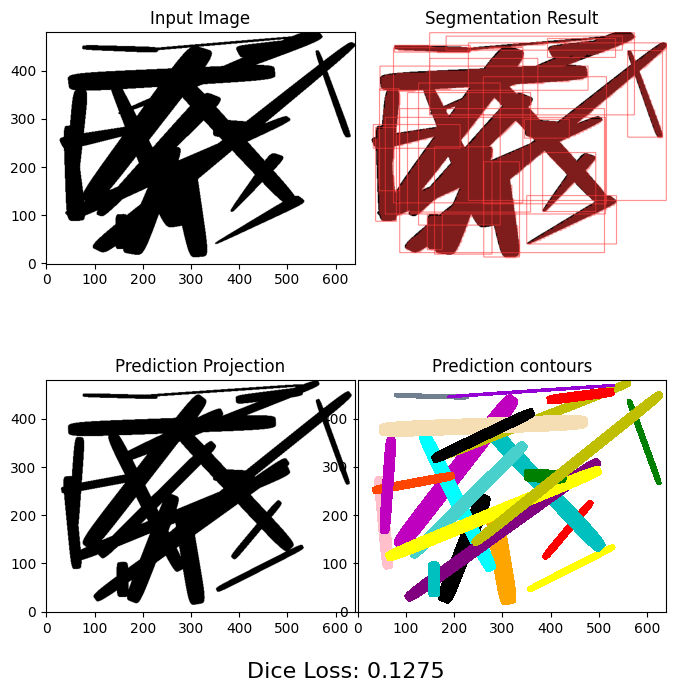

In [3]:
import sys
sys.path.append('./utils')

from yolo_utils import preprocess_image, run_model, save_results, process_results, plot_results

# Load and preprocess the image
image_path = '/Users/thomasrochefort/Documents/GitHub/YOLOv8-TO/datasets/mmc_random/train/2023-11-26_10-09-40258_9.png'
image = preprocess_image(image_path, threshold_value=0.9, upscale=False)
# Run the model
results = run_model(model, image, conf=0.05, iou=0.5, imgsz=640)
# Save the results
save_results(results, filename='results.jpg')
# Process the results
input_image_array_tensor, seg_result, pred_Phi, sum_pred_H, final_H, dice_loss, tversky_loss = process_results(results, image)
# Plot the results
plot_results(input_image_array_tensor, seg_result, pred_Phi, sum_pred_H, final_H, dice_loss, tversky_loss, filename='combined_plots.png')